# 다중회귀

### 데이터 전처리

In [1]:
#pandas 데이터 분석 라이브러리를 사용한다.
#https://raw.githubusercontent.com/rickiepark/hg-mldl/master/perch_full.csv
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()
print(perch_full) #length, height, width 데이터.

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [2]:
#weight data
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
#perch_full과 perch_weight를 train set과 test set으로 나누기.
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=45)


In [4]:
#PolynomialFeatures 클래스 사용하기.
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))
#훈련(fit)을 해야 trainsform(변환)이 가능하다.
#transform은 각 특성을 제곱한 항을 추가하고, 특성끼리 서로 곱한 항을 추가한다.
#1은 절편에 항상 1이 곱해지는 계수라고 생각할 수 있으나 사이킷런 선형모델은 자동으로 절편을 추가하므로 1을 만들어줄 필요가 없다.

[[1. 2. 3. 4. 6. 9.]]


In [5]:
#include_bias=False를 지정하여 1을 삭제한다.
#궂이 삭제 하지 않아도 사이킷런 모델은 절편 항을 무시하지만, 혼돈을 피하기 위해 명시적으로 지정하였다.
poly = PolynomialFeatures(include_bias = False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))
#결과로 절편항이 사라지고, 특성의 제곱과 특성끼리 곱한 항만 추가되었다.

[[2. 3. 4. 6. 9.]]


In [6]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_input.shape)
print(train_poly.shape)

(42, 3)
(42, 9)


In [7]:
#9개의 특성이 어떻게 만들어졌는지 확인하기.
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [8]:
test_poly = poly.transform(test_input)

### 훈련하기

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly,train_target))

0.9915618822227039


In [10]:
print(lr.score(test_poly,test_target))

0.9787823460273424


### 특성을 더많이 추가해 보기. 5제곱까지 추가.

In [11]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape) 
#5제곱까지 추가하면 특성이 55개가 된다.

(42, 55)


In [12]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
#train set의 score은 매우 높게 나왔다.

0.999999999716785


In [13]:
#하지만 test set의 score는 매우 낮게 나왔다.
print(lr.score(test_poly, test_target))

-1527.202188072524


**훈련세트에 과대적합되어서 결과가 낮게 나왔다.**

### 규제(Regularization)   
규제는 머신러닝 모델이 train set을 너무 과하게 학습하지 못하도록 즉 과대적합 되지 않도록 만든다.   
선형회귀의 경우 특성에 곱해지는 계수의 크기를 작게만든다.

### 정규화
규제하기 전에 정규화를 해줘야 함.

In [14]:
#사이킷런의 StandardScaler클래스를 사용하여 특성을 표준점수로 쉽게 정규화한다.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)
#평균과 표준편차는 StandardScaler의 mean_, scale_ 속성에 저장된다.

### 릿지(Ridge)   회귀
계수를 제곱한 값을 기준으로 규제를 적용한다.

In [15]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9898630062193705


In [16]:
print(ridge.score(test_scaled, test_target))

0.9843929690788588


### alpha값, 찾는법.

**릿지와 라쏘 모델을 사용할때 alpha 매개변수로 규제의 강도를 조절한다.   
alpha 값이 크면(규제강도가 세지는 것) 계수값이 더 줄어든다. 과소적합 쪽으로 감.   
alpha 값이 작으면(규제강도가 작아지는 것) 계수값이 더 늘어난다. 과대적합쪽으로감.**

**하이퍼 파라미터 : alpha와 같이 모델이 학습하는 값이 아니라 사전에 사람이 직접 지정해야 하는값을 말한다.   
머신러닝 라이브러리에서 하이퍼파라미터는 클래스와 메서드의 매개변수로 표현된다.**

In [17]:
#적절한 alpha값 찾는법. alpha에 대한 R**2그래프를 그려보기.
#train set과 test set의 점수가 가장 가까운 지점이 최적의 alpha값이 된다.
import matplotlib.pyplot as plt
#score 메서드의 결과를 저장할 리스트를 만든다.
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    #lidge모델을 만든다.
    ridge = Ridge(alpha=alpha) #뒤의  alpha는 for문의 매개변수.
    
    #훈련한다.
    ridge.fit(train_scaled, train_target)
    
    #train score와 test score를 저장한다.
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

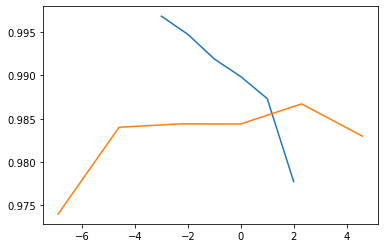

In [18]:
#왼쪽이 너무 넓기때문에 로그함수로 바꾸어 표현한다.
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log(alpha_list), test_score)
plt.show()
#그래프를 보면 1.7쯤에서 alpha의 최적의 값이 나왔다.

In [21]:
#alpha에 1.7지정하기.
ridge = Ridge(alpha = 1.7)
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.989398669293391
0.9845139747084595


### 라쏘(lasso)   회귀
계수의 절댓값을 기준으로 규제를 적용한다.

In [22]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled,train_target))

0.9892895754482841


In [25]:
print(lasso.score(test_scaled,test_target))
#적절한 결과를 보여준다.

0.9843535935383836


**라쏘에도 alpha 매개변수로 규제의 강도를 조절할 수 있다.**

In [26]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    #lasso모델을 만든다.
    lasso = Lasso(alpha=alpha, max_iter=10000) #뒤의  alpha는 for문의 매개변수.
    
    #훈련한다.
    lasso.fit(train_scaled, train_target)
    
    #train score와 test score를 저장한다.
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9335.641262982288, tolerance: 456.1920767857143
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5959.798496405246, tolerance: 456.1920767857143
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 500.14563778166485, tolerance: 456.1920767857143
  model = cd_fast.enet_coordinate_descent(


**lasso 모델은 최적의 계수를 찾기 위해 반복적인 계싼을 수행하는데 반복 횟수가 부족할때 경고가 발생한다.   
반복횟수를 충분히 늘리기 위해 max_iter 매개변수값을 10000으로 지정해 주었다.**

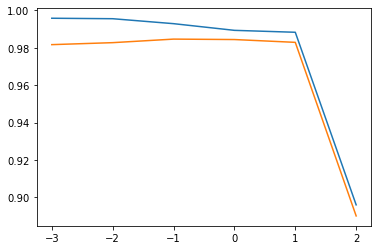

In [28]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()
#alpha값은 1이다.

In [29]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.988255409100762
0.9831047524565621


In [30]:
#lasso모델은 계수값을 0으로 만들 수 있다.
#계수값들은 coef_에 저장되어있다.
#계수로 0을 사용한 특성의 개수를 알아보자.
print(np.sum(lasso.coef_ == 0))

48


**lasso모델에서 55개의 특성중 7개의 특성만 사용되었다.**